# 차원 축소를 사용한 데이터 압축

* 주성분 분석을 사용한 비지도 데이터 압축하기
* 지도 방식의 차원 축소 기법인 선형 판별 분석을 이용하여 클래스 구별 능력 최대화하기
* 커널 PCA를 사용한 비선형 차원 축소하기

## 5.1 주성분 분석을 통한 비지도 차원 축소

특정 선택과 마찬가지로 여러 가지 특성 추출 기법을 사용하여 데이터셋의 특성 개수를 줄일 수 있다. 특성 선택과 특성 추출의 차이는 원본 특성을 유지하느냐에 있다.
순차 후진 선택 같은 특성 선택 알고리즘을 사용할 때는 원본 특성을 유지하지만 특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 투영한다.

차원 축소 관점에서 보면 특성 추출은 대분분의 관련있는 정보를 유지하면서 데이터를 압축하는 방법으로 이해할 수 있다. 특성 추출이 저정 공간을 절약하거나
학습 알고리즘의 계산 효율성을 향상 할뿐만 아니라 차원의 저주 문제를 감소시켜 예측 성능을 향상하기도 한다.

### 5.1.1 주성분 분석의 주요 단계

특성 추출과 차원 축소 용도로 PCA를 많이 사용한다.
PCA를 많이 사용하는 애플리케이션에는 EDA, 노이즈 제거, 게놈 데이터나 유전자 발현 분석 등에서 많이 쓰인다.

PCA는 특성 사이의 상관관례를 기반으로 하여 데이터에 있는 특성을 잡아낼 수 있다. 요약해서 말하면 PCA는 고차원 데이터에서 분산이 가장 큰 방향을
찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영한다. 새로운 부분 공간의 직교 좌표는 주어진 조건하에서 분산이 최대인 방향으로 해석할 수 있다.



![](./img/IMG_942FBAE51B97-1.jpeg)

PCA를 사용하여 차원을 축소하기 위해 $d \times k$ 차원의 변환 행렬 $w$를 만든다. 이 행렬로 샘플 벡터 x를 새로운 k 차원의 특성 부분 공간으로 맵핑한다.

$$x = [x_1, x_2, \cdots, x_d],x \in \mathbb{R}^d$$

$$x\mathcal{W} ,\mathcal{W} \in \mathbb{R}^{d\times k}$$

$$z = [z_1, z_2, \cdots, z_k], z \in \mathbb{R}^k$$

원본 d 차원 데이터를 새로운 k 차원의 부분 공간으로 변환하여 만들어진 첫 번째 주성분이 가장 큰 분산을 가질 것이다. 모든 주성분은 다른 주성분들과 상관관계가
없다는(직교한다는) 제약하에 가장 큰 분산을 가진다.

PCA 방향은 데이터 스케일에 매우 민감하나. 특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화
전처리해야한다.

### 5.1.2 주성분 추출 단계

1. 데이터를 표준화 전처리한다.
2. 공분산 행렬을 구성한다.
3. 공분산 행렬의 고윳값과 고유 벡터를 구한다.
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다.

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings(action='ignore')
df_wine = pd.DataFrame(data=load_wine().data, columns=load_wine().feature_names);


In [27]:
from sklearn.model_selection import train_test_split
X, y = df_wine, load_wine().target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

앞 코드를 실행하여 필수적인 전처리 단계를 완료한 후 공분산 행렬을 만드는 두 번째 단계를 진행한다.
공분산 행렬은 $d\times d$차원의 대칭 행렬로 특성 상호간의 공분산을 저장한다.

$$\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n(x_j^{(i)} - u_j)(x_k^{(i)} - u_k)$$

여기서 $u_j$와 $u_k$는 특성 j와 k의 샘플 평균이다. 데이터셋을 표준화 전처리했기 때문에 샘플 평균은 0이다. 두 특성 간의 양의 공분산은 특성이
함께 증가하거나 감소하는 것을 나타낸다. 반면 음의 공분산은 특성이 반대 방향으로 달라진다는 것을 나타낸다.
예를들어 3개의 특성으로 이루어진 공분산 행렬은 다음과 같이 쓸 수 있다.

$$\Sigma = \begin{bmatrix} \sigma_1^2 & \sigma_{12} & \sigma_{13} \\ \sigma_{21} &\sigma_{2}^2& \sigma_{23} \\ \sigma_{31}& \sigma_{32}& \sigma_{3}^2 \end{bmatrix}$$

공분 행렬의 고유 벡터가 주성분을 표현한다. 이에 대응되는 고윳값은 주성분의 크기이다.

세 번째 단계를 위해 공분산 행렬의 고유 벡터와 고윳값의 쌍을 구해 보자.

$$\Sigma v = \lambda v$$


넘파이의 linalg.eig 함수를 이용해서 공분산 행렬에 대한 고유 벡터와 고유값 쌍을 계산한다.

In [38]:
X_train_std.T.shape

(13, 124)

In [50]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n 고윳값 \n %s' % eigen_vals)


 고윳값 
 [4.64451481 2.57102415 1.4438212  1.06304816 0.82649765 0.67291818
 0.52561908 0.08846227 0.16890788 0.33046178 0.21620101 0.29056752
 0.26364737]


Note

        numpy.linalg.eig 함수는 대칭과 비대칭 정방 행렬을 모두 다룰 수 있지만 이따금 복소수 고윳값을 반환한다.
        numpy.linalg.eigh는 항상 실수 고윳값을 반환한다.


        사이킷런의 PCA클래스는 직접 고윳값과 고유 벡터를 계산하는 대신 특이 값 분해(Singular Value Decomposition) 방식을 사용하여 주성분을 구한다.


### 5.1.3 총분산과 설명된 분산

데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보를 가진 고유 벡터 일부만 선택한다.
고윳값은 고유 벡터의 크기를 결정하므로 고유값을 내림차순으로 정렬한다. 고윳값 순서에 따라 최상위 k개의 고유 벡터를 선택한다.
가장 정보가 많은 k개의 고유 벡터를 선택하기 전에 고윳값의 설명된 분산 비율을 그래프로 그려 본다.
고윳값 $\lambda_j$의 설명된 분산 비율은 전체 고윳값의 합에서 고윳값 $\lambda_j$의 비율이다.

$$\frac{\lambda_j}{\sum_{j=1}^d\lambda_j}$$


넘파이 cumsum 함수로 설명된 분산의 누적 합을 계산하고 맷플롯립의 step 함수로 그래프를 그려 보겠다.

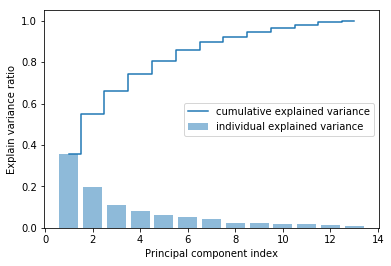

In [51]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel("Explain variance ratio")
plt.xlabel("Principal component index")
plt.legend()
plt.show()

### 5.1.4 특성 변환

공분산 행렬을 고유 벡터와 고윳값 쌍으로 성공적으로 분해한 후 Wine 데이터셋을 새로운 주성분 축으로 변환하는 나머지 세 단계를 진행해 보자.

* 고윳값이 가장 큰 k 개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다.($k\leq d$)
* 최상위 k개의 고유 벡터로 투영 행렬 w를 만든다.
* 투영 행렬 w를 사용해서 d 차원 입력 데이터셋 x를 새로룬 k 차원의 특성 부분 공간으로 변환한다.

좀 더 쉽게 설명하면 고윳값의 내림차순으로 고유 벡터를 정렬하고 선택된 고유 벡터로 투영 행렬을 구성한다. 이 투영 행렬을 사용하여 데이터를 저차원 부분 공간으로 변환한다.

In [57]:
# (고유값, 고유 벡터) 튜플의 리스트
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [58]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [65]:
# np.hstack : 두 배열을 왼쪽에서 오른쪽으로 붙이기
# np.newaxis : 간단히 이야기 해서 존재하는 numpy array의 차원을 늘려준다
# reshape는 변환전 차원의 합과 변환후 차원의 합이 같아야 합니다.
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W : \n', w)

투영 행렬 W : 
 [[-0.13537081 -0.4869733 ]
 [ 0.26772065 -0.17021975]
 [ 0.0252175  -0.3901542 ]
 [ 0.23232212 -0.08162147]
 [-0.15854481 -0.28882495]
 [-0.39458646 -0.08974359]
 [-0.43217369 -0.0144524 ]
 [ 0.29211461 -0.08881327]
 [-0.29340546 -0.04531621]
 [ 0.07186722 -0.5035456 ]
 [-0.30051286  0.25071607]
 [-0.37340514  0.15702343]
 [-0.28541179 -0.36373453]]


In [92]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

# 13 dimension -> 2 dimension

(124, 2)

In [ ]:
X_train_std[0].dot(w)

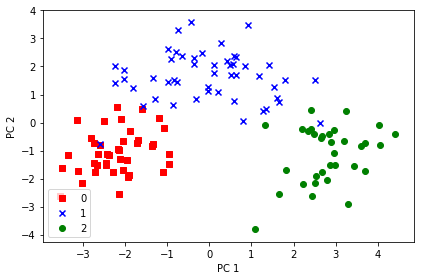

In [100]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 5.1.5 사이킷런의 주성분 분석

In [115]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', ' cyan')
    cmap = ListedColormap(colors[ :len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[ y== cl, 1],
                    alpha=0.6, c=cmap.colors[idx],
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

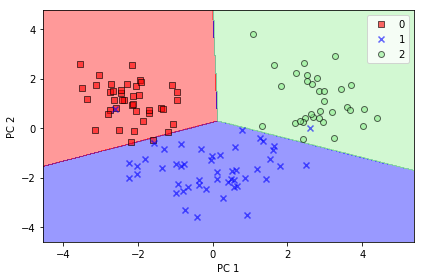

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()

테스트 세트에서의 결정 경계

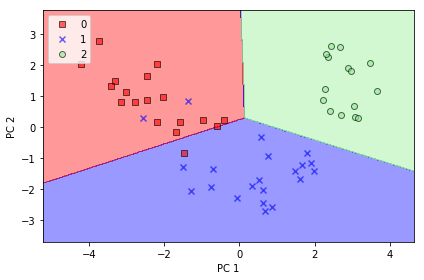

In [119]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()

전체 주성분의 설명된 분산 비율을 알고 싶다면 n_components 매개변수를 None 으로 지정하고 PCA 클래스 객체를 만들면 된다.
explained_variance_ratio_ 속성에서 모든 주성분의 설명된 분산 비율을 확인할 수 있다.

In [120]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


array([0.35438916, 0.19617616, 0.1101675 , 0.08111348, 0.06306403,
       0.05134549, 0.04010617, 0.02521514, 0.02217109, 0.02011701,
       0.01649673, 0.01288813, 0.00674991])

## 5.2 선형 판별 분석을 통한 지도 방식의 데이터 압축

**선형 판별 분석**(Linear Discriminant Analysis, LDA)은 균제가 없는 모델에서 차원의 저주로 인한 과대적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법으로 사용할 수 있다.

LDA 이면에 있는 일반적인 개념은 PCA 와 매우 비슷하다. PCA가 데이터셋에 있는 분산이 최대인 직교 성분 축을 찾으려고 하는 반면, LDA
목표는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것이다.

### 5.2.1 주성분 분석 VS 선형 판별 분석석

PCA와 LDA 모두 데이터셋의 차원 개수를 줄일 수 있는 선형 변환 기법이다. 전자는 비지도 학습 알고리즘이지만 후자는 지도 학습 알고리즘이다.
직과적으로 LDA가 PCA보다 분류 작업에서 더 뛰어난 특성 추출 기법이라고 생각할 수 있다.
PCA를 통한 전처리가 특정 이미지 익식 작업에 더 뛰어난 분류 결과를 내는 경향이 있다는 의견도 있다.
예를 들어 각 클래스에 속한 샘플이 몇 개 되지 않을 떄이다.


LDA를 다중 클래스로 확장한 공식

$$J = \frac{w^TS_Bw}{w^TS_ww}$$

여기서 w는 선형 판별을 위한 변환 벡터고 $S_B$와 $S_W$는 다음절에서 설명할 클래스 간의 산포 행렬과 클래스 내 산포 행렬이다.
분모 $w^TS_ww$를 일정하게 유지하면서 분자 $w^TS_Bw$를 최대화하는 문제로 보고 랑그랑주 승수법을 적용하면 다음과 같은 결과를 얻는다.

$$S_Bw = \lambda S_Ww$$

$$S_W^{-1} S_B w= \lambda w$$

결국 $S_W^{-1} S_B$의 고윳값 분해 문제가 된다.


![](./img/IMG_29DAA1E3A86A-1.jpeg)


x축(LD 1)으로 투영하는 선형 판별 벡터는 두 개의 정규 분포 클래스를 잘 구분한다. y축(LD 2)으로 투영하는 선형 판별 벡터는 데이터셋에 있는 분산을 많이 잡아내지만
클래스의 판별 정보가 없기 떄누에 좋은 선형 판별 벡터가 되지 못한다.

LDA는 데이터가 정규 분포라고 가정한다. 또 클래스가 동일한 공분산 행렬을 가지고 샘플을 서로 통계쩍으로 독립적이라고 가정한다.
하나 이상이 가정이 위반되더라도 여전히 LDA는 차원 축소를 상당히 잘 수행한다.


### 5.2.2 선형 판별 분석의 내부 동작 방식

1. d 차원의 데이터셋을 표준화 전처리한다
2. 각 클래스에 대해 d 차원의 평균 벡터를 계산한다.
3. 클래스 간의 산포 행렬(scatter matrix) $S_B$와 클래스 내 산포 행렬 $S_w$를 구성한다.
4. $S_W^{-1} S_B$ 행렬의 고유 벡터와 고윳값을 계산한다.
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다.
6. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 d x k 차원의 변환 행렬 W를 구성한다. 이 행렬의 열이 고유 벡터이다.
7. 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다.


LDA는 단계 2에서 계산하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용한다.

### 5.2.3 산포 행렬 계산

평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬을 구성한다. 평균 벡터 $m_i$는 클래스 i의 샘플에 대한 특성의 평균값
$u_m$을 저장한다.

$$$m_i = \frac{1}{n} \sum_{x\in D_i}^c x_m$

In [131]:
np.set_printoptions(precision=4)    # Float 출력옵션 변경하는 방법
mean_vecs = []
for label in range(0, 3):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))

    print('MV %s: %s\n' %(label, mean_vecs[label]))

MV 0: [ 0.8991 -0.3542  0.3991 -0.6492  0.5692  0.8494  0.9742 -0.4678  0.4884
  0.2674  0.4319  0.7188  1.2132]

MV 1: [-0.8543 -0.2937 -0.5329  0.1241 -0.3856 -0.0378  0.0533 -0.0392  0.0846
 -0.8444  0.4619  0.29   -0.717 ]

MV 2: [ 0.1773  0.8851  0.3116  0.6185 -0.123  -0.9981 -1.2911  0.6406 -0.735
  0.9472 -1.2364 -1.3324 -0.4209]



평균 벡터를 사용하여 클래스 내 산포 행렬 $S_w$를 계산할 수 있다.

$$S_w = \sum_{x \in D_i}^c S_i$$

이 행렬은 개별 클래스 i의 산포 행렬 $S_i$를 더하여 구한다.

$$S_i = \sum_{x \in D_i}^c(x-m_i)(x-m_i)^T$$

In [132]:
d = 13  # 특성 개수
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('클래스 내의 산포 행렬 : %s x %s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬 : 13 x 13


In [139]:
print('클래스 레이블 분포 : %s' % np.bincount(y_train)[0:]) # bincount()는 0 부터 객체x의 최대값까지 각 원소의 빈도수

클래스 레이블 분포 : [41 50 33]


개별 산포 행렬 $S_i$를 산포 행렬 $S_w$로 모두 더하기 전에 스케일 조정 해야한다.
산포 행렬 클래스 샘플개수 $\eta_i$로 나누면 사실 산포행렬을 계산하는 것이 공분산 행렬 $\Sigma_i$를 계산하는 것과 같아진다.
즉, 공분산 행렬은 산포 행렬의 정규화 버전이다.

$$\Sigma_i=\frac{1}{n_i}S_i=\frac{1}{n_i}\sum_{x\in D_i}^c(x-m_i)(x-m_i)^T$$

In [140]:
d = 13  # 특성 개수
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T, bias=True)
    S_W += class_scatter

print('스케일 조정된 클래스 내의 산포 행렬 : %s x %s' % (S_W.shape[0], S_W.shape[1]))


스케일 조정된 클래스 내의 산포 행렬 : 13 x 13


클래스 간의 산포 행렬 $S_B$를 계산

$$S_B = \sum_{i=1}^c n_i(m_i - m)(m_i - m)^T$$

여기서 m은 모든 클래스의 샘플을 포함하여 계산된 전체 평균이다.

In [147]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

S_B = np.zeros((d, d))
for i, mean_vecs in enumerate(mean_vecs):
    n = X_train[y_train == i + 1].shape[0]
    S_B += n * (mean_vecs - mean_overall).dot((mean_vecs-mean_overall).T)

print('클래스 간의 산포 행렬 : %s x %s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬 : 13 x 13


### 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택

LDA의 남은 단계는 PCA와 유사하다. 공분산 행렬에 대한 고윳값 분해를 수행하는 대신 행렬 $S_w^{-1}S_B$의 고윳값을 계산하면 된다.

In [148]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [149]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('내림차순의 고윳값 : \n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값 : 

366.231846311389
3.35084567597785e-14
2.4999085072838265e-14
2.305588481719007e-14
2.305588481719007e-14
1.9865733218981937e-14
1.8051419031539413e-14
1.1298084429322248e-14
1.1298084429322248e-14
9.905835288649667e-15
4.5320412250731755e-15
3.1718531608408876e-17
0.0


LDA에서 선형 판별 벡터는 최대 c-1개이다. c는 클래스 레이블의 개수이다. 클래스 내 산포 행렬 $S_B$가 랭크 1 또는 그 이하인 c개의
행렬을 합한 것이기 때문이다.

note

        드물게 완벽하게 공선성을 가지는 경우 공분산 행렬의 랭크는 1이다. 이때는 0이 아닌 고윳값을 가진 고유 벡터가 하나만 만들어진다.


선형 판별 벡터(고유 벡터)로 잡은 클래스 판별 정보가 얼마나 많은지 측정하기 위해 PCA 절에서 만든 설명된 분산 그래프와 비슷하게 고유값의 내림차순으로 선형 판별 벡터를 그려보자

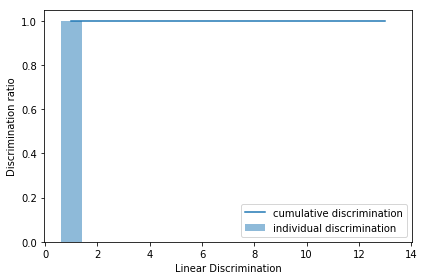

In [161]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]

cum_discr = np.cumsum(discr)

import matplotlib.pyplot as plt

plt.bar(range(1,14), discr, alpha=0.5, align='center', label='individual discrimination')
plt.step(range(1,14), cum_discr, where='mid', label='cumulative discrimination')
plt.ylabel("Discrimination ratio")
plt.xlabel("Linear Discrimination")
plt.legend()
plt.tight_layout()
plt.show()

In [162]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print(w)

[[ 0.0571  0.4667]
 [ 0.1947 -0.4209]
 [-0.0265 -0.1985]
 [-0.0192  0.133 ]
 [ 0.1598  0.2121]
 [-0.2178  0.17  ]
 [ 0.6591 -0.3805]
 [ 0.2333  0.2086]
 [-0.0534  0.093 ]
 [ 0.1715 -0.2929]
 [ 0.265  -0.0284]
 [ 0.404   0.327 ]
 [ 0.3609 -0.2891]]


### 5.2.5 새로운 특성 공간으로 샘플 투영

$$X^{'}=XW$$

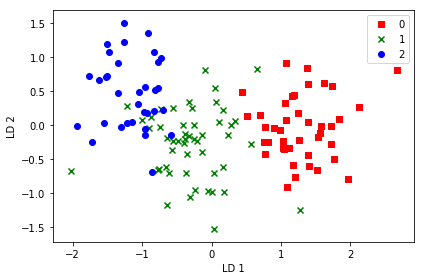

In [163]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1), c=c, marker=m, label=l)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.tight_layout()
plt.show()

### 5.2.6 사이킷런의 LDA

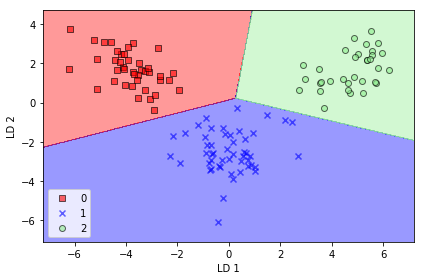

In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.tight_layout()
plt.show()

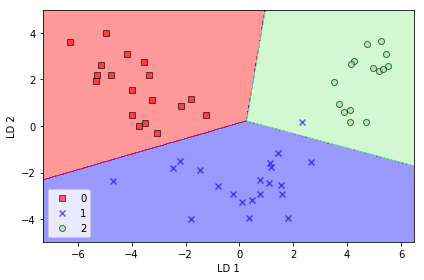

In [165]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.tight_layout()
plt.show()

## 5.3 커널 PCA를 사용하여 비선형 매핑

많은 머신 러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다는 가정을 한다. 퍼셉트론은 수렴하기 위해 훈련 데이터가 선형적으로 완벽하게
분리 가능해야 한다고 배웠다. 지금 까지 다뤘던 알고리즘들은 선형적으로 완벽하게 분리되지 못한 이유를 잡음 때문이라고 가정한다.

비선형 문제를 다루어야 한다면 PCA와 LDA같은 차원 축소를 위한 선형 변환 기법은 최선의 선택이 아니다.

PCA의 커널화 버전 또는 KPCA를 다룬다.

![](./img/IMG_9B657ACF96AA-1.jpeg)

### 5.3.1 커널 함수와 커널 트릭

k 고차원 부분 공간에 있는 샘플 $x \in \mathbb{R}^d$를 반환하기 위해 비선형 매핑 함수를 정의한다.

$$\phi :\mathbb{R}^d \rightarrow \mathbb{R}^k $$

$\phi$함수를 d차원의 원본 데이터셋에서 더 큰 k 차원의 특성 공간으로 매핑하기 위해 원본 특성의 비선형 조합을 만드는 함수로 생각할 수 있다.
예를 들어 2차원의 특성 벡터 $x \in \mathbb{R}^d$가 있으면, 매핑 가능한 3D 공간은 다음과 같다.

$$x = [x1, x2]^T \rightarrow\phi\rightarrow z = [x_1^2, \sqrt{2x_1}, x_2^2]^T$$

다른 말로 하면 커널 PCA를 통한 비선형 매핑을 수행하여 데이터를 고차원 공간으로 변환한다.
그 다음 고차원 공간에 표준 PCA를 사용하여 샘플이 선형 분류기로 구분될 수 있는 저차원 공간으로 데이터를 투영한다.
이 방식의 단벙은 계산 비용이 매우 비싸다는 것이다. 여기서 커널트릭이 등장한다. 커널 트릭을 사용하면 원본 특성 공간에서 두 고차원 벡터의 유사도를 계산할 수 있다.


먼저 표준 PCA 방식을 다시 생각해보자, 두 개의 특성 k와 j 사이의 공분산은 다음과 같이 계산한다.

$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^n(x_j^i - u_j)(x_k^i - u_k) $$

$u_j=0, u_k=0$처럼 특성 평균을 0에 맞추었으므로(표준화를 통해서) 이 식은 다음과 같이 간단히 쓸 수 있다.

$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^n x_j^ix_k^i  $$

이 식은 두 특성 간의 공분산을 의미한다. 공분산 행렬 $\Sigma$를 계산하는 일반식

$$\Sigma = \frac{1}{n}\sum_{i=1}^n x^{(i)}x^{(i)^T}  $$

베른하르트 슐코프는 이 방식을 일반화하여 비선형 특성 조합으로 원본 특성 공간의 샘플 사이의 접곱을 대체했다.

$$\Sigma = \frac{1}{n}\sum_{i=1}^n \phi(x^{(i)})\phi(x^{(i)})^T  $$

이 공분산 행렬에서 고유 벡터를 얻기 위해서는 다음 식을 풀어야 한다.

$$\Sigma v = \lambda v \rightarrow  \frac{1}{n}\sum_{i=1}^n \phi(x^{(i)})\phi(x^{(i)})^T v = \lambda v$$
$$\rightarrow v = \frac{1}{n\lambda}\sum_{i=1}^n \phi(x^{(i)})\phi(x^{(i)})^T v$$
$$=\sum_{i=1}^n a^i \phi(x^i)$$

여기서 $\lambda$와 v는 공분산 행렬 $\Sigma$의 고윳값과 고유 벡터이다. a는 커널(유사도) 행렬 K의 고유 벡터를 추출함으로써 구할 수 있다.

커널 행렬은 다음과 같이 유도할 수 있다. 먼저 공분산 행렬을 행렬 표기법으로 나타낸다. 여기서 $\phi(X)$는 nxk 차원의 행렬이다.

$$\Sigma = \frac{1}{n}\sum \phi(x^i)\phi(x^i)^T = \frac{1}{n}\phi(X)^T\phi(X)$$

고유 벡터 식은 다음과 같이 쓸 수 있다.

$$v =\sum_{i=1}^n a^i \phi(x^i) = \phi(X)^T a$$

$\Sigma v = \lambda v$이기 때문에 다음을 얻는다.

$$\frac{1}{n}\phi(X)^T\phi(X)\phi(X)^Ta = \lambda\phi(X)^Ta$$

식의 양쪽에 $\phi(X)$를 곱하면

$$\frac{1}{n}\phi(X)\phi(X)^Ta = \lambda a \rightarrow \frac{1}{n}Ka = \lambda a$$

여기서 K는 유사도 행렬이다.


커널 PCA로 얻은 것은 표준 PCA 방식에서처럼 투영 행렬을 구성한 것이 아니고 각각의 성분에 이미 투영된 샘플이다. 기본적으로 커널 함수는
두 벡터의 사이의 점곱을 셰산할 수 있는 함수이다. 즉, 유사도를 특정할 수 있는 함수다.

가장 널리 사용되는 커널은 다음과 같다.

* 다항 커널
    - $\kappa(x^i, x^j) = (x^{(i)T}x^{(j)}+\theta)^P$

        여기서는 $\theta$는 입계 값이고 P는 사용자가 지정한 거듭제곱이다.

* 하이퍼볼릭 탄젠트 커널
    - $\kappa(x^i, x^j) = tanh(\eta x^{(i)T}x^{(j)} + \theta) $

* 방사 기저 함수 또는 가우시안 커널
    - $\kappa(x^i, x^j) = exp \left( - \frac{\lVert x^i - x^j \rVert^2 }{2\sigma^2}\right)$

변수 $\gamma = \frac{1}{2\sigma^2}$을 도입하여 종종 다음과 같이 쓴다.

$$\kappa(x^i, x^j) = exp \left( - {\gamma\lVert x^i - x^j \rVert^2 }\right)$$

지금 까지 배운 것을 요약 하면 PBF 커널 PCA를 구현하기 위해 다음 세 단계를 정의 할 수 있다.

1. 커널 행렬 K를 다음 식으로 계산한다.

$$\kappa(x^i, x^j) = exp \left( - {\gamma\lVert x^i - x^j \rVert^2 }\right)$$

샘플의 모든 쌍에 대해 구한다.

$ K = \begin{bmatrix}\kappa(x^1, x^1) & \kappa(x^1, x^2)& \cdots &\kappa(x^1, x^n)\\
\kappa(x^2, x^1) & \kappa(x^2, x^2)& \cdots &\kappa(x^2, x^n) \\
\vdots & \vdots & \ddots & \vdots \\
\kappa(x^n, x^1) & \kappa(x^n, x^2)& \cdots &\kappa(x^n, x^n)
 \end{bmatrix}$

예를 들어 100개의 훈련 샘플이 담긴 데이터셋이라면 각 쌍의 유사도를 담은 대칭 커널 행렬은 100 x 1001 차원이 도ㅓㅣㄴ다.

2. 다음 식을 사용하여 커널 행렬 K를 중앙에 맞춘다.

$$K^{'} = K-1_nK-K1_n+1_nK1_n$$

여기서 $1_n$은 모든 값이 $\frac{1}{n}$dls n x n 차원 행렬이다.

3. 고윳값 크기대로 내림차순으로 정렬하여 중앙에 맞춘 커널 행렬에서 최상위 K개의 고유 벡터를 고른다. 표준 PCA와 다르게
고유 벡터는 주성분 축이 아니며, 이미 이 축에 투영된 샘플이다.


여기서 두 번째 단계에서 왜 커널 행렬을 중앙에 맞추었는지 궁금할지 모른다. 앞서 우리는 표준화 전처리된 데이터를 다룬다고 가정했다.
공분산 행렬을 구성하고 비선형 특성 조합으로 점곱을 $\phi$를 사용한 비성형 특성 조합으로 점곱을 대체할 때 사용한 모든 특성 평균이 0이다.
반면 새로운 특성 고간을 명시적으로 계산하지 않기 떄문에 이 특성 공간이 중앙에 맞추어져 있는지 보장 할 수 없다. 이것이 새로운 두 번째 단계에서 커널 행렬을 중앙을 맞추는 것이 필요한 이유이다.

사이킷런에서는 커널을 중앙에 맞추기 위한 KernelCenterer 클래스를 제공한다.

In [168]:
from sklearn.preprocessing import KernelCenterer
K_centered = KernelCenterer().fit_transform(K)

### 5.3.2 파이썬으로 커널 PCA 구현

편리하게 사이킷런은 sklearn.decomposition 모듈 아래 커널 PCA 클래스를 구현해 놓았다.
사용법은 기본 PCA 클래스와 비슷하다. kernel 매개변수로 커널의 종류를 지정한다.

In [169]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

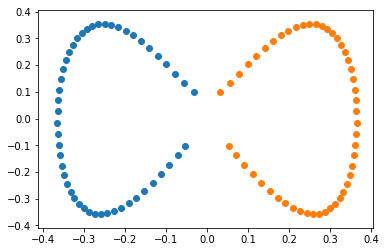

In [172]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1])
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1])
